## POSTTEST 4
#### NAMA : Desti Yulianingsih
NIM : 2209106059

Siapkan library yang diperlukan untuk melakukan klasifikasi dengan metode Support Vector Classifier

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

Lalu tampilkan data sebelum melakukan klasifikasi untuk mengetahui record dalam dataset

In [10]:
sb = pd.read_csv("football-league.csv")
sb.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


Tampilkan info dataset untuk mengetahui info-info dalam dataset

In [23]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

Selanjutnya kita pisahkan data menjadi dua subset, satu untuk pelatihan model (X_train dan y_train) dan satu untuk pengujian model (X_test dan y_test).
Karena 'Club' adalah label kategorikal, maka kita ubah dulu menjadi numerikal dengan menggunakan LabelEncoder.

In [24]:
X = sb[['Matches_Played', 'Goals']]
y = sb['Club']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Gunakan Support Vector Classifier dari sklearn.svm untuk melatih model dan memprediksi data uji.

In [25]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Selanjutnya prediksi data uji dengan kode dibawah ini

In [26]:
y_pred = svc_model.predict(X_test)

#### Evaluasi
Gunakan accuracy_score dan classification_report untuk mengevaluasi kinerja model menggunakan pretty table. Dalam kode ini saya menggunakan parameter zero_divison untuk mengatasi jika precision atau recall tidak dapat didefinisikan (karena tidak ada sampel atau prediksi untuk label tertentu), nilainya akan diatur menjadi 1 daripada memberikan peringatan.

In [27]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

accuracy_table = PrettyTable()
accuracy_table.field_names = ["Metric", "Value"]
accuracy_table.add_row(["Accuracy", round(accuracy, 4)])

report_dict = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
classification_table = PrettyTable()

classification_table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

for label, metrics in report_dict.items():
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        classification_table.add_row([
            label,
            round(metrics['precision'], 2),
            round(metrics['recall'], 2),
            round(metrics['f1-score'], 2),
            int(metrics['support'])
        ])

avg_table = PrettyTable()
avg_table.field_names = ["Metric", "Precision", "Recall", "F1-Score", "Support"]

for avg_type in ['macro avg', 'weighted avg']:
    avg_table.add_row([
        avg_type,
        round(report_dict[avg_type]['precision'], 2),
        round(report_dict[avg_type]['recall'], 2),
        round(report_dict[avg_type]['f1-score'], 2),
        int(report_dict[avg_type]['support'])
    ])

Panggil table untuk melihat hasil evaluasi dalam bentuk table dengan kode dibawah.

In [28]:

print(accuracy_table)
print(classification_table)
print(avg_table)

+----------+--------+
|  Metric  | Value  |
+----------+--------+
| Accuracy | 0.0682 |
+----------+--------+
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    1.0    |  0.0   |   0.0    |    1    |
|   1   |    0.04   |  0.5   |   0.07   |    2    |
|   3   |    1.0    |  0.0   |   0.0    |    2    |
|   4   |    1.0    |  0.0   |   0.0    |    2    |
|   5   |    1.0    |  0.0   |   0.0    |    1    |
|   6   |    1.0    |  0.0   |   0.0    |    3    |
|   8   |    1.0    |  0.0   |   0.0    |    1    |
|   11  |    0.0    |  0.0   |   0.0    |    2    |
|   12  |    1.0    |  0.0   |   0.0    |    1    |
|   13  |    1.0    |  0.0   |   0.0    |    1    |
|   17  |    1.0    |  0.0   |   0.0    |    3    |
|   21  |    1.0    |  0.0   |   0.0    |    1    |
|   25  |    1.0    |  0.0   |   0.0    |    1    |
|   28  |    1.0    |  0.0   |   0.0    |    3    |
|   33

###### Accuracy : Menunjukkan seberapa baik model dalam memprediksi label secara keseluruhan.
###### Classification Report : Menyediakan metrik evaluasi seperti precision, recall, F1-score, dan support untuk setiap kelas (label).

Evaluasi confusion matrix menggunakan code dibawah ini.

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

# menampilkan confusion matrix sebagai tabel/angka
print("Confusion Matrix :")
print(conf_matrix)
plt.show()

Confusion Matrix :
[[0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 8]]


##### Plot hasil prediksi dengan classification report

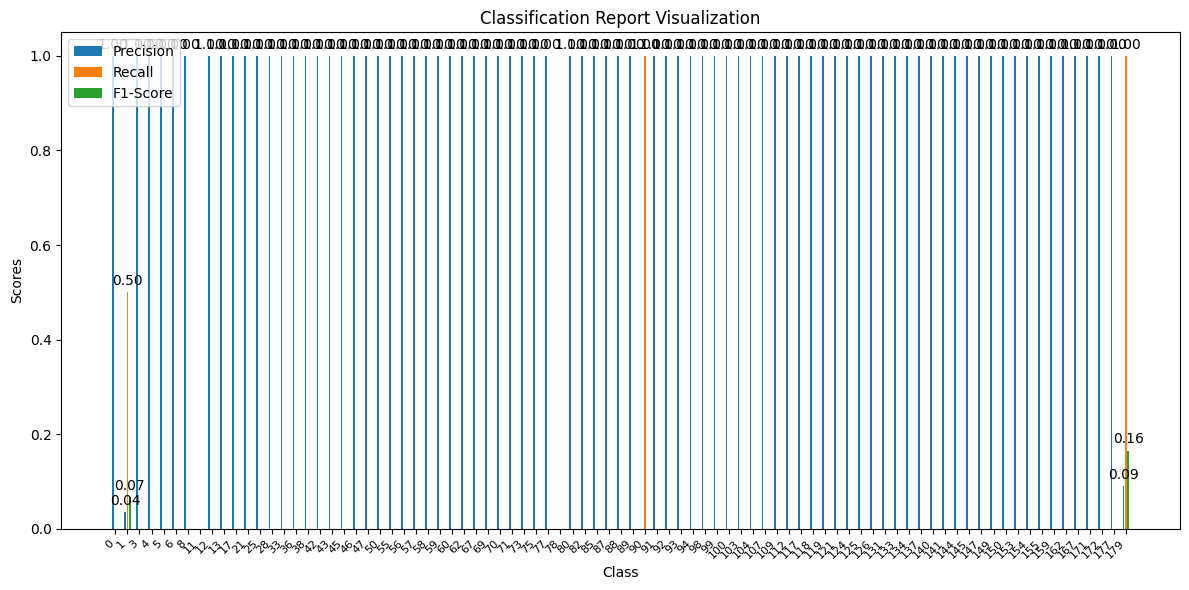

In [39]:
labels = list(report_dict.keys())[:-3]  # Ambil label tanpa avg dan accuracy
precision = [report_dict[label]['precision'] for label in labels]
recall = [report_dict[label]['recall'] for label in labels]
f1_scores = [report_dict[label]['f1-score'] for label in labels]
x = np.arange(len(labels))

width = 0.15
gap = 0.05

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width - gap, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width + gap, f1_scores, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax.legend()

def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0.01:
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

plt.tight_layout()
plt.show()


Membuat DataFrame baru menggunakan Pandas yang berisi kolom 'Actual' (nilai sebenarnya) dan 'Predicted' (hasil prediksi) dari data pengujian (y_test dan y_pred).

In [40]:
sb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


Membuat dan menampilkan sebuah heatmap yang menggambarkan korelasi antara kolom-kolom dalam DataFrame, dengan fokus pada korelasi antara nilai sebenarnya ('Actual') dan hasil prediksi ('Predicted').

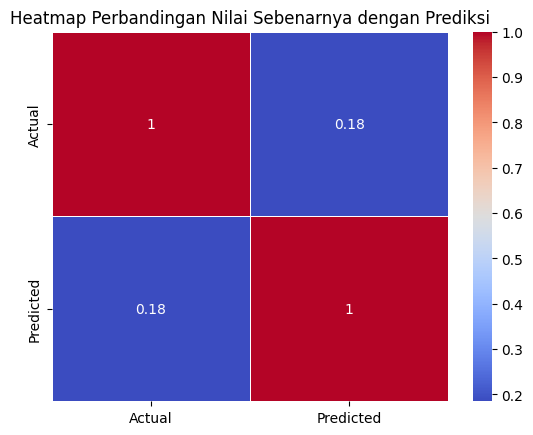

In [41]:
sns.heatmap(sb.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Perbandingan Nilai Sebenarnya dengan Prediksi")
plt.show()


Heatmap ini menunjukkan bahwa model memiliki prediksi yang benar dengan nilai sempurna 1 pada kelas-kelas yang sesuai (diagonal). Namun, terdapat 18% kesalahan prediksi di mana beberapa instance dari satu kelas diklasifikasikan sebagai kelas lain.